# Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

### Core Concepts We'll Cover:
1.  **Data Cleaning & Transformation:** Handling missing values and converting data types (especially dates).
2.  **Time-Series Analysis:** Analyzing how content has been added to Netflix over the years.
3.  **Text Data Manipulation:** Parsing and analyzing columns with multiple values, like `listed_in` (genres) and `cast`.
4.  **Geographical & Rating Analysis:** Understanding where content comes from and its maturity level.
5.  **Feature Engineering:** Creating new, insightful features like 'content age'.
6.  **Advanced Visualization:** Creating insightful plots to understand distributions and relationships in the data.

### Step 1: Setup - Importing Libraries

As always, we begin by importing our essential data science toolset, including a new library for word clouds.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

### Step 2: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset and perform a high-level overview.

In [100]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [101]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [102]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object` (a string), not a `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.

In [104]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

#### **Theoretical Concept: Data Type Conversion & Handling Nulls**
Data often comes in non-ideal formats. Storing dates as strings, for example, prevents us from extracting components like the year or month, or from plotting data over time. Converting columns to their proper data types (`pd.to_datetime`, `.astype()`) is a fundamental preprocessing step.

For null values, we have several strategies:
1.  **Drop:** If only a very small percentage of rows have missing data, dropping them might be acceptable (`.dropna()`).
2.  **Fill/Impute:** Replace missing values with a placeholder (like "Unknown") or a statistical measure (like the mode for categorical data). This is useful when you don't want to lose the other information in those rows.

In [105]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [106]:
## 1) Handling missing values in 'Director' and 'cast'

# Find top 20 most frequent directors
top_20_directors = df['director'].value_counts().head(20)
print("\nTop 20 directors:\n", top_20_directors)

# Compute proportional probabilities for these directors
director_probs = top_20_directors / top_20_directors.sum()


print("\nMissing directors after filling:", df['director'].isna().sum())


Top 20 directors:
 director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Lance Bangs                8
Hakan Algül                8
Quentin Tarantino          8
Robert Rodriguez           8
Shannon Hartman            8
Kunle Afolayan             8
Johnnie To                 8
Ozan Açıktan               7
S.S. Rajamouli             7
McG                        7
Name: count, dtype: int64

Missing directors after filling: 2389


In [107]:
#  Get indices where director is missing
nan_indices = df[df['director'].isna()].index

# Fill missing values proportionally using random sampling
df.loc[nan_indices, 'director'] = np.random.choice(
    director_probs.index,
    size=len(nan_indices),
    p=director_probs.values
)


In [108]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [109]:
## 2) Handling missing values in 'country'
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [110]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,718
country,0
date_added,10
release_year,0
rating,7
duration,0


In [111]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.

df.dropna(subset=['date_added','rating'], inplace=True)

In [112]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,718
country,0
date_added,0
release_year,0
rating,0
duration,0


In [113]:
## 4) Convert 'date_added' to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [114]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Jay Chapman,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7052 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [116]:
## 5) Creating a new feature for year and month

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [117]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Jay Chapman,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


### Step 4: Exploratory Data Analysis & Visualization

#### 4.1 What is the distribution of content type?

In [118]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


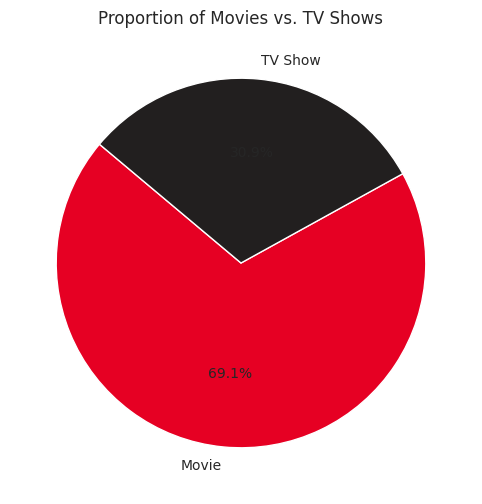

In [119]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

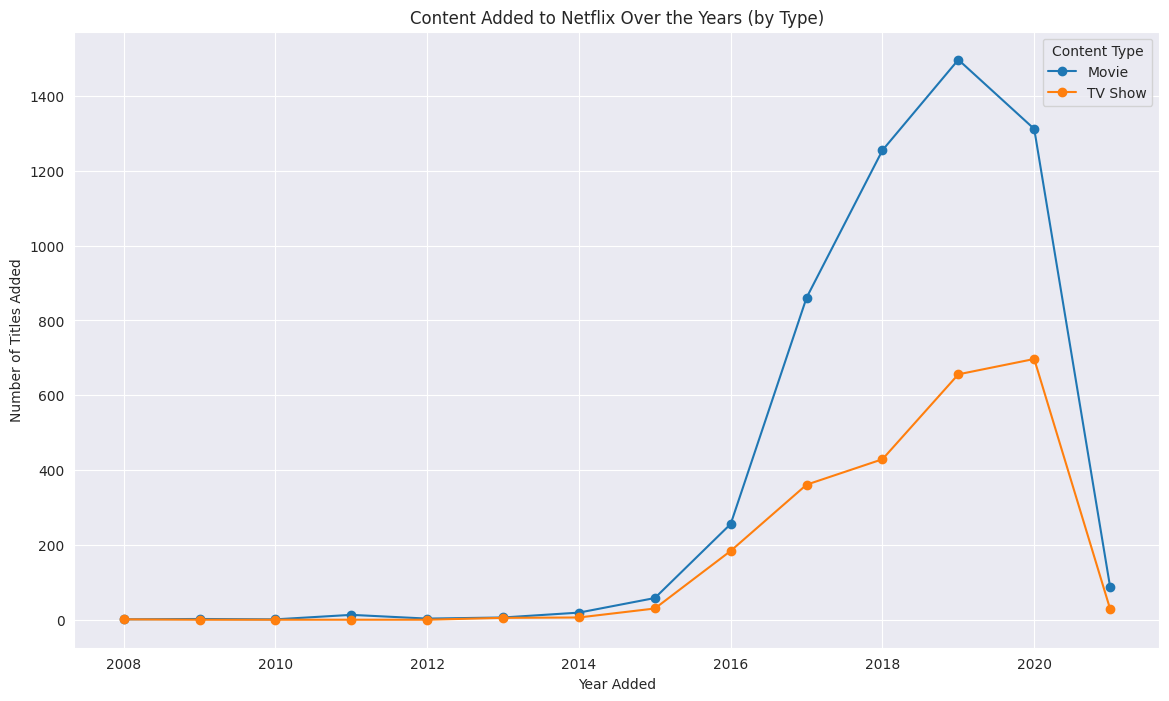

In [120]:
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
content_over_time.plot(kind = 'line', marker = 'o', figsize=(14,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

#### 4.3 What are the most popular genres?

#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [121]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

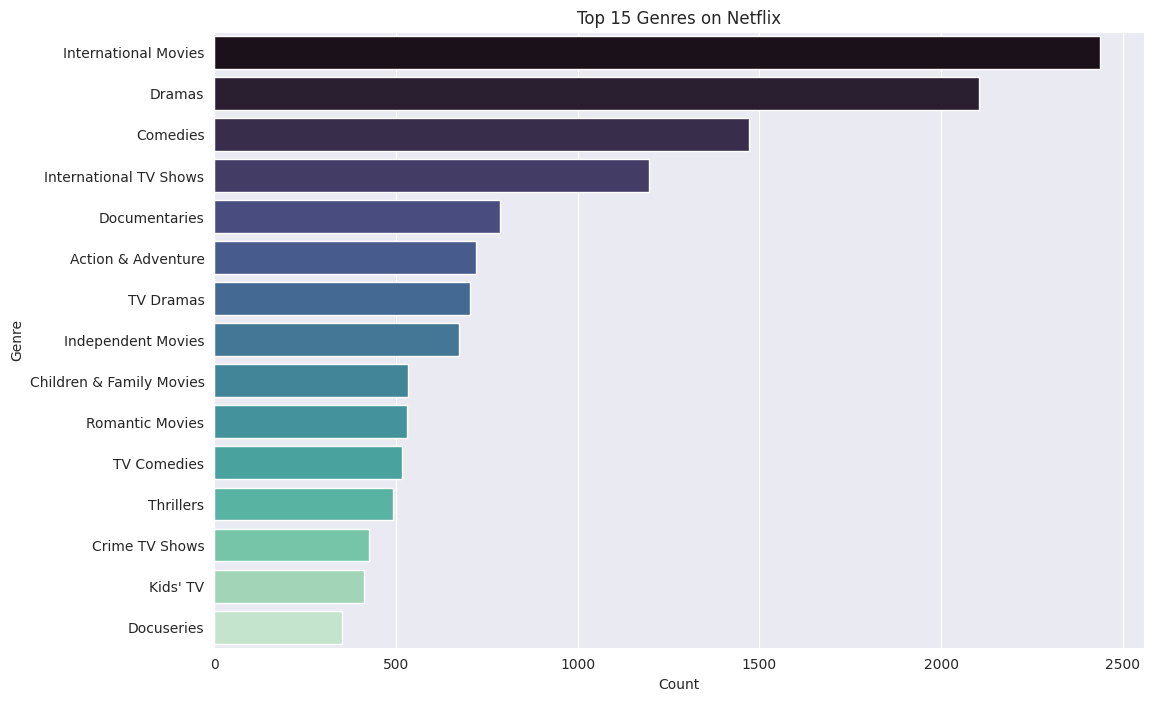

In [122]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [123]:
## Seperate movies and TV Shows

movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [124]:
tv_shows_df['duration'] = tv_shows_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

In [125]:
movies_df['duration'] = movies_df['duration'].str.replace(' min','').astype(int)

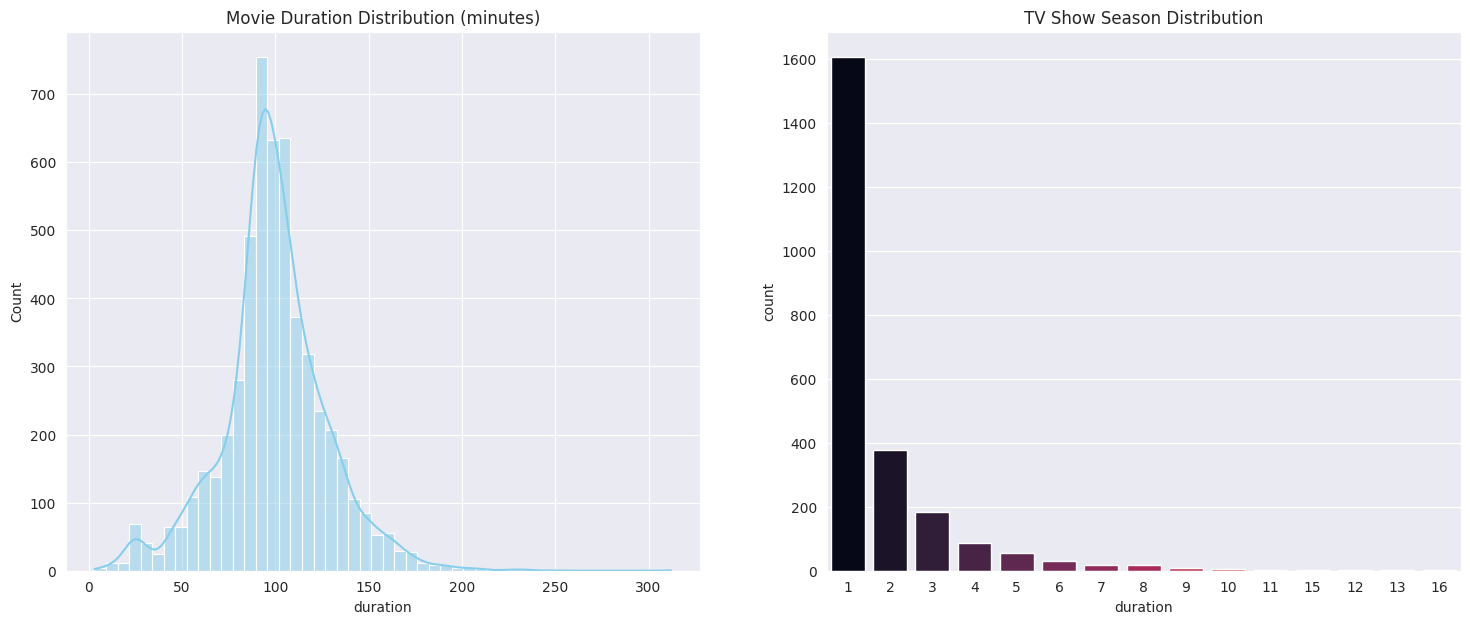

In [126]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='duration', data=tv_shows_df, palette='rocket', order=tv_shows_df['duration'].value_counts().index, hue='duration', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [127]:
## Handle the mult-country listed
countries = df.assign(country = df['country'].str.split(', ')).explode('country')

In [128]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

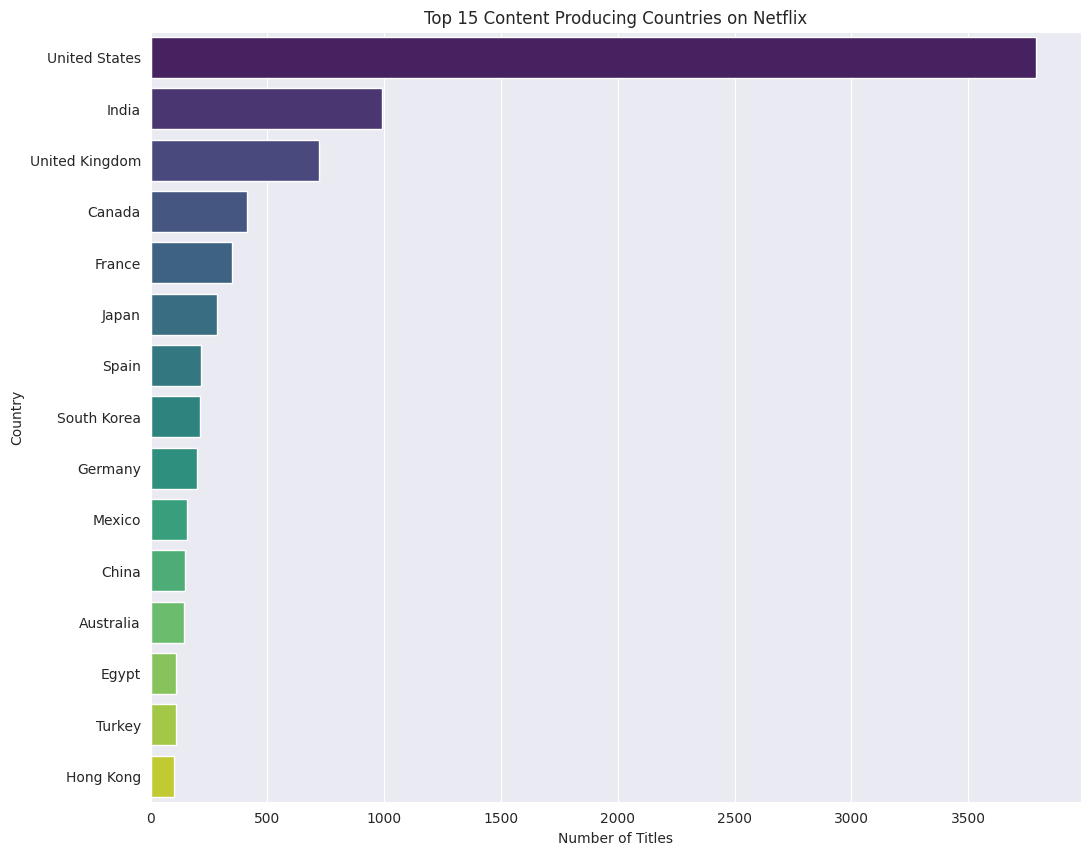

In [129]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

#### 4.6 What are the maturity ratings of the content?

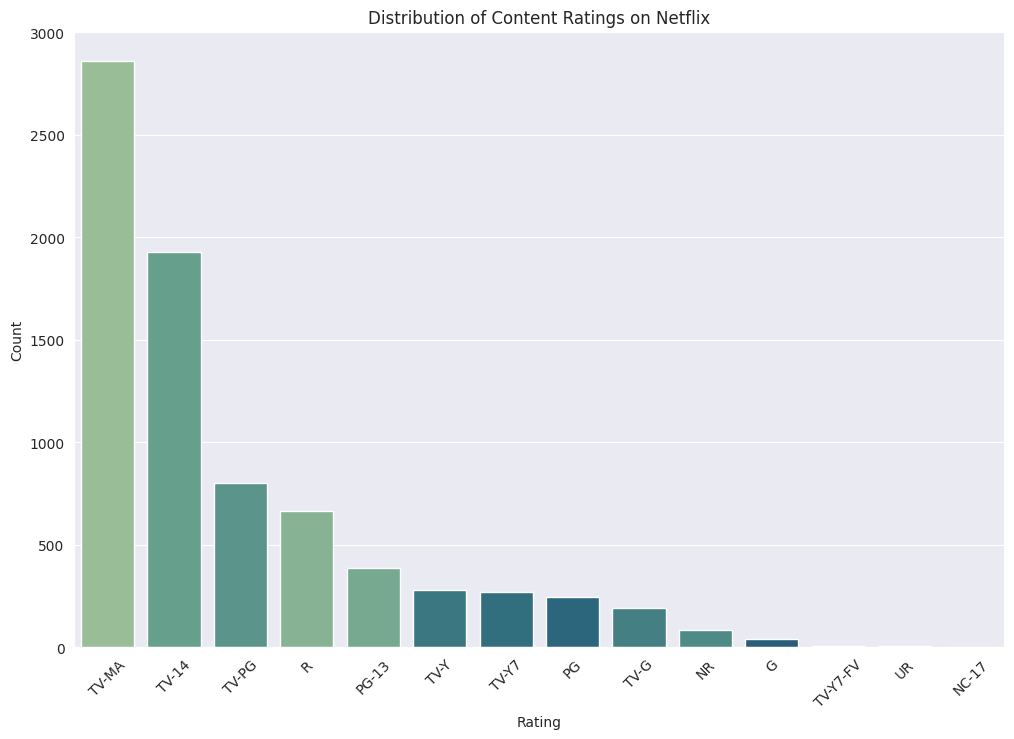

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

In [131]:
## Creating a column 'age_on_netflix' feature

df['age_on_netflix'] = df['year_added'] - df['release_year']

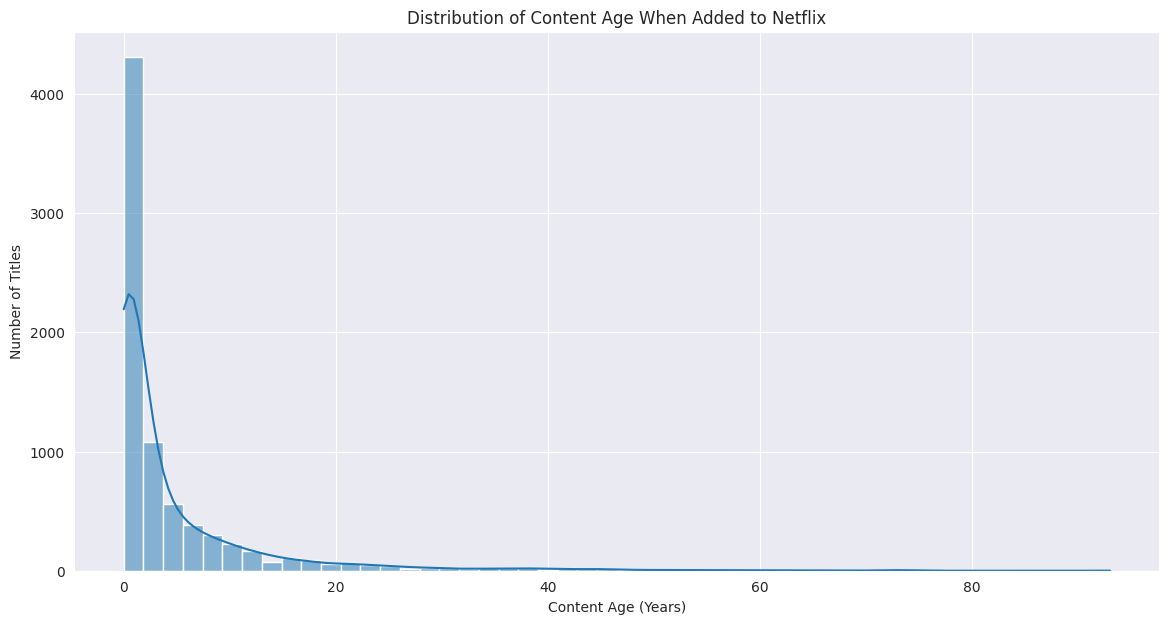

In [132]:
## Filter out any potential errors when added_year is before release_year

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

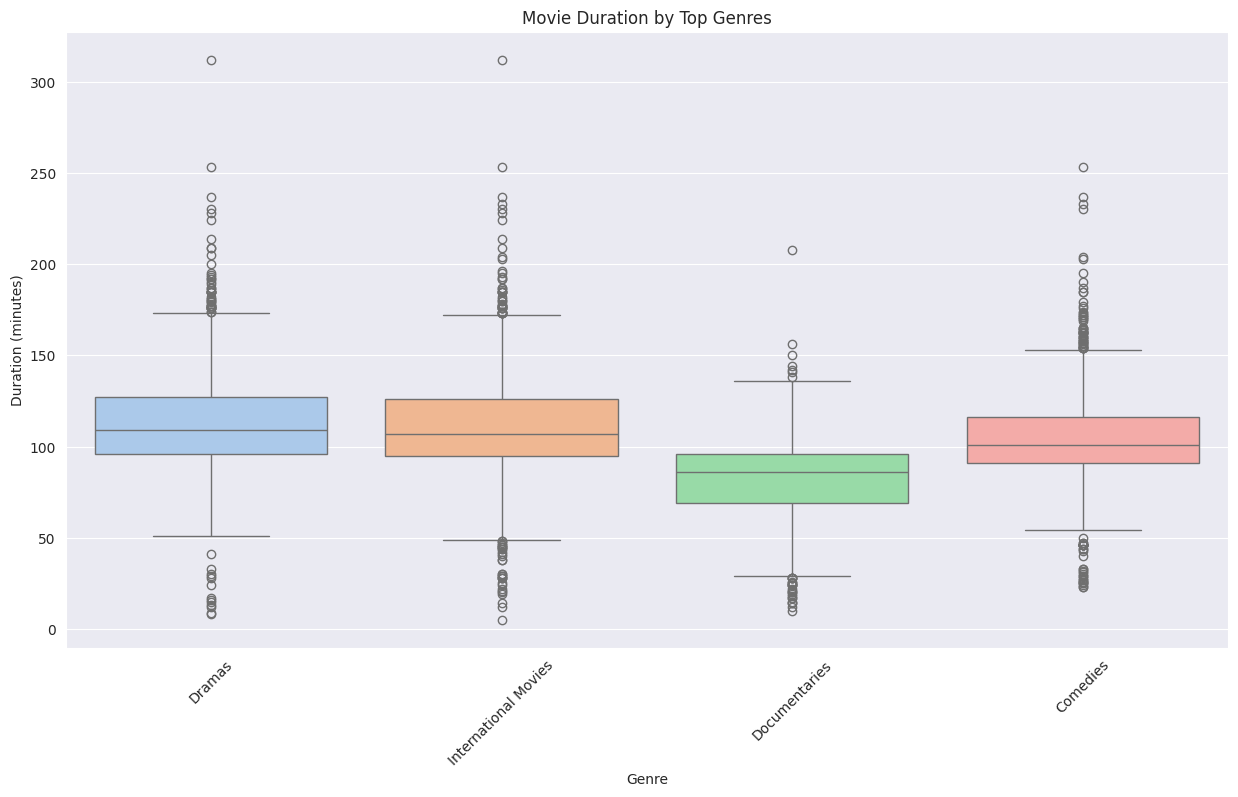

In [133]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [134]:
text = ' '.join(df['description'])

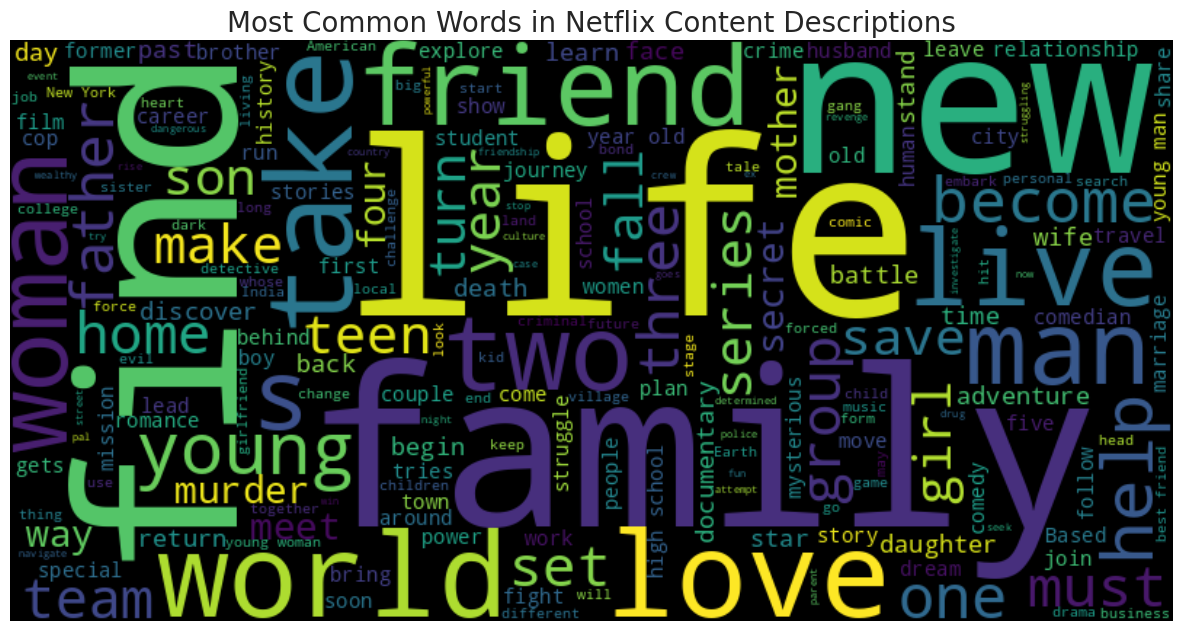

In [135]:
## Generating the visual
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

In [136]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Jay Chapman,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

# HERE IS THE SOLN FOR THE ASSIGNMENTS

## 1-> How has the distribution of content ratings changed over time?

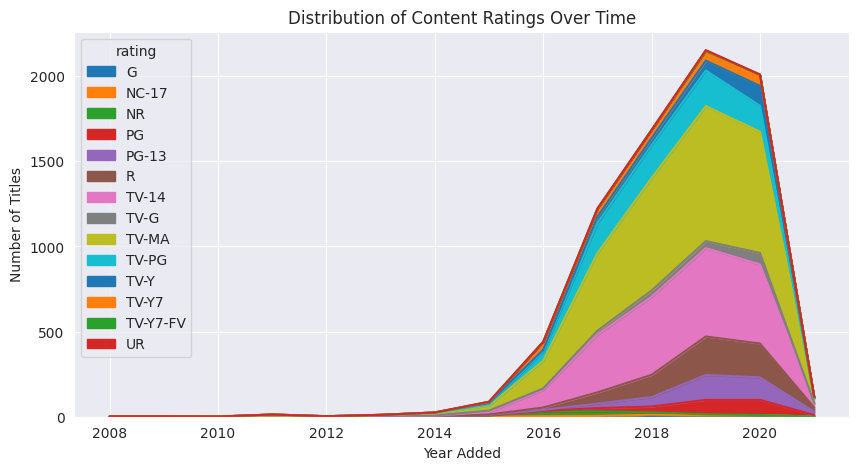

In [138]:
# Count ratings per year
rating_trend = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Plot stacked area
rating_trend.plot(kind='area', figsize=(10,5), stacked=True)
plt.title("Distribution of Content Ratings Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


**Insight:** : Over time, Netflix’s content has shifted heavily toward mature and teen-rated shows, with TV-MA and TV-14 becoming dominant after 2016. The number of titles surged until around 2019–2020, then declined slightly. Early years had few additions, mostly movie ratings (PG, R), but later years show a clear focus on TV-oriented, mature content.

## 2->Is there a relationship between content age and its type (Movie vs. TV Show)?

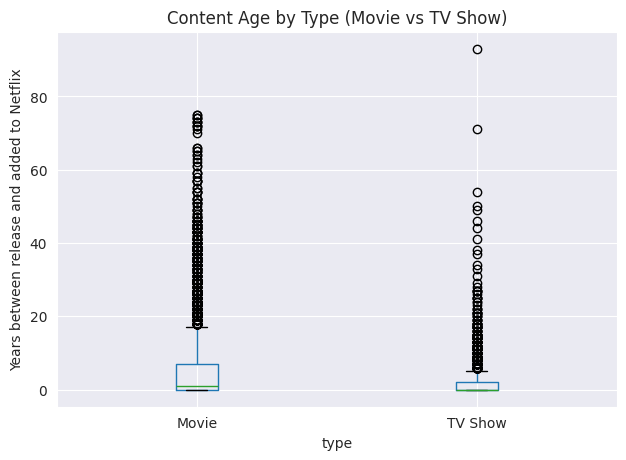

,content_age
type,
Movie,5.565736
TV Show,2.326214


In [139]:
# Calculate how old content was when added
df['content_age'] = df['year_added'] - df['release_year']

# Drop invalid ages
df = df[(df['content_age'] >= 0) & (df['content_age'] <= 100)]

# Boxplot to compare
df.boxplot(column='content_age', by='type', figsize=(7,5))
plt.title("Content Age by Type (Movie vs TV Show)")
plt.suptitle('')
plt.ylabel("Years between release and added to Netflix")
plt.show()

# Average age by type
df.groupby('type')['content_age'].mean()


**Insight:**   On average, Movies have a higher content age (≈5.6 years) than TV Shows (≈2.3 years), meaning movies are typically added to Netflix several years after their release, while TV shows are added more quickly, often soon after or during their airing.

## 3->Can we identify any trends in content production based on the release year vs. the year added to Netflix?

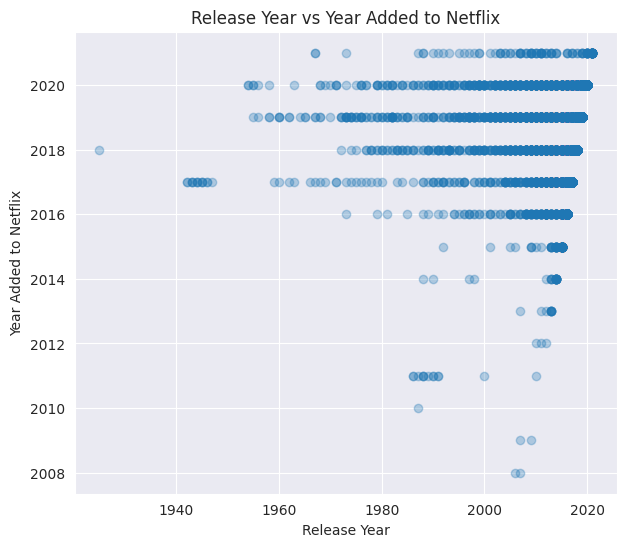

,lag
count,7758.000000
mean,4.568574
std,8.738085
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


In [140]:
plt.figure(figsize=(7,6))
plt.scatter(df['release_year'], df['year_added'], alpha=0.3)
plt.title("Release Year vs Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()

# How long after release it was added
df['lag'] = df['year_added'] - df['release_year']
df['lag'].describe()


Yes — the plot shows clear trends in content production and addition to Netflix:

Most content added after 2015: The majority of titles, regardless of release year, were added to Netflix between 2016 and 2020, marking Netflix’s major expansion phase.

Recent releases dominate: A strong concentration appears along the diagonal (release year ≈ year added), showing that newly released content is quickly added to Netflix.

Older content added in bulk: Titles from earlier decades (1950s–2000s) were mostly added around 2016–2018, likely when Netflix expanded its catalog by acquiring older movies and shows.

## 4->What are the most common word pairs or phrases in content descriptions?

                    bigram  count
35480          high school    133
85883             year old    130
86312            young man    103
86445          young woman     98
52750             new york     85
69587           small town     59
6734           best friend     51
79375           true story     48
71583        stand special     47
85509            world war     45
6735          best friends     44
5835            based true     43
45783          los angeles     38
21293  documentary follows     38
82885               war ii     37
26325           falls love     37
21344   documentary series     35
86117            york city     34
64022            road trip     33
67268        serial killer     32


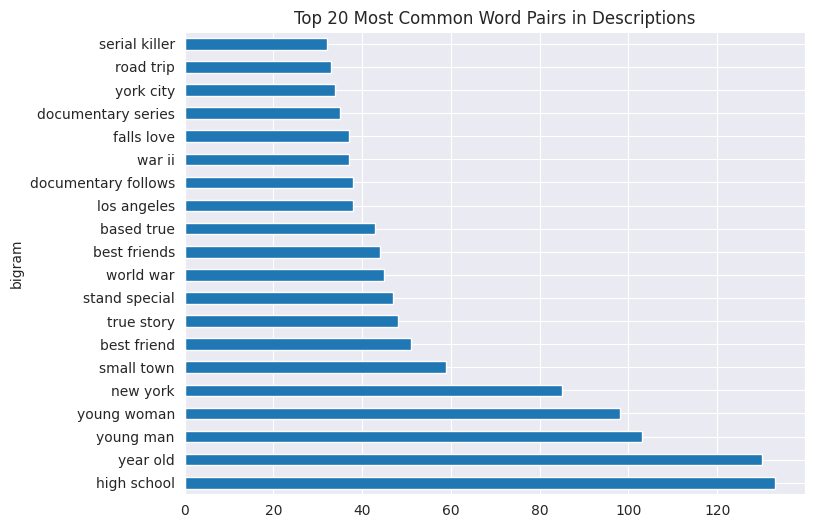

In [141]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer for bigrams (2-word phrases)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
X = vectorizer.fit_transform(df['description'])

# Get word pair counts
counts = X.sum(axis=0).A1
bigrams = pd.DataFrame({'bigram': vectorizer.get_feature_names_out(), 'count': counts})
bigrams = bigrams.sort_values('count', ascending=False).head(20)

# Show and plot
print(bigrams)
bigrams.plot.barh(x='bigram', y='count', figsize=(8,6), legend=False)
plt.title("Top 20 Most Common Word Pairs in Descriptions")
plt.show()


**Insight:** The most common word pairs (bigrams) in Netflix content descriptions are terms like “high school,” “year old,” “young man,” “young woman,” “new york,” and “small town.”

## 5->Who are the top directors on Netflix?

## I have distributed the unknown values in director column to top 20 directors  

I have done it above will handling nan values

Raúl Campos            236
 Jan Suter             236
Marcus Raboy           197
Jay Chapman            173
Cathy Garcia-Molina    171
Jay Karas              171
Martin Scorsese        156
Youssef Chahine        143
Steven Spielberg       125
David Dhawan           118
Name: count, dtype: int64


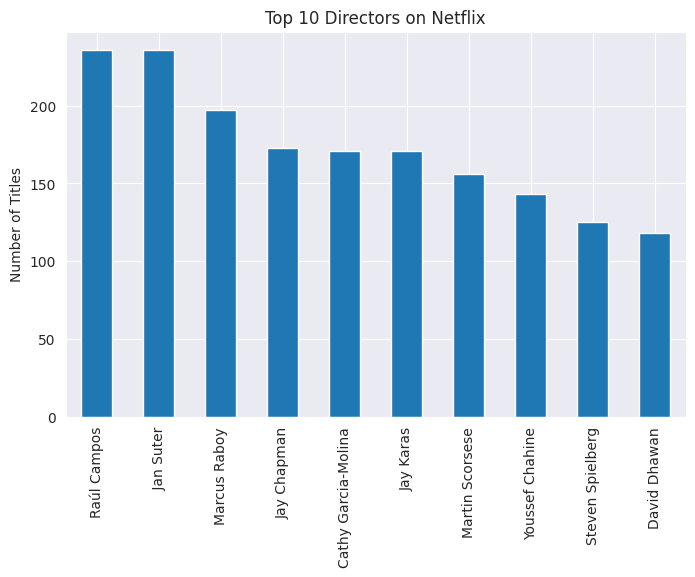

In [142]:
# Split multiple directors and count
directors = df['director'].dropna().str.split(',').sum()
top_directors = pd.Series(directors).value_counts().head(10)

print(top_directors)
top_directors.plot(kind='bar', figsize=(8,5), title='Top 10 Directors on Netflix')
plt.ylabel("Number of Titles")
plt.show()


**Insight:** The top spots are dominated by Raúl Campos and Jan Suter, who have directed numerous Netflix stand-up comedy specials. This suggests Netflix has a large volume of comedy and live performance content from these directors.

# THANK YOU FOR READING TILL THE LAST